<a href="https://colab.research.google.com/github/muskanny/TWITTER-TREND-PREDICTION-MODEL/blob/main/TWITTER_TREND_PREDICTION_RESEARCH_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv("/content/2021_June_twitter_trending_data.csv")



<ipython-input-43-3255c255e82d>:9: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/2021_June_twitter_trending_data.csv")


In [ ]:
#2
data.head()

,tweet_id,tweet_datetime,tweet_hashtags,tweet_language,retweet_count,tweet_source,tweet_source_url,tweet_text,user_created_datetime,user_name,user_followers_count,user_description,user_location,searched_by_hashtag,searched_at_datetime,searched_hashtag_country
0,1399565320025640961,2021-06-01 03:15:49,agedcare,en,59,Twitter Web App,https://mobile.twitter.com,RT @SenatorSiewert: The Government are acting ...,2015-03-19 19:29:57,"Richard Forrester: Anti Fascist, Evil #SewerRat 🐀",3526.0,Commenting & working towards social justice & ...,Mornington Peninsula Melbourne,#estimates,2021-06-01 03:15:46.457488,Australia
1,1399565250723139586,2021-06-01 03:15:33,estimates,en,4,Twitter for iPhone,http://twitter.com/download/iphone,RT @TomMcIlroy: Some aged care vax stats given...,2014-01-15 22:32:01,Say No To Murdoch’s IPA 🥊,2017.0,“The Future Is Determined By Those Who Show Up...,Straya,#estimates,2021-06-01 03:15:46.457488,Australia
2,1399565250475675653,2021-06-01 03:15:33,NaN,en,383,Twitter for Android,http://twitter.com/download/android,"RT @CroweDM: Katy Gallagher: ""Are you responsi...",2014-04-18 06:55:37,🏳️‍🌈💧🔥🐀Buddy & Mum Proud Sewer Rats,1400.0,"A mix of politics and animals, I do this for l...",Australia,#estimates,2021-06-01 03:15:46.457488,Australia
3,1399565240350613504,2021-06-01 03:15:30,NaN,en,18,Twitter for iPhone,http://twitter.com/download/iphone,RT @TomMcIlroy: The vaccine rollout has been g...,2014-01-15 22:32:01,Say No To Murdoch’s IPA 🥊,2017.0,“The Future Is Determined By Those Who Show Up...,Straya,#estimates,2021-06-01 03:15:46.457488,Australia
4,1399565229529329665,2021-06-01 03:15:28,NaN,en,5,Twitter for iPhone,http://twitter.com/download/iphone,"RT @TomMcIlroy: About 32,000 aged care workers...",2014-01-15 22:32:01,Say No To Murdoch’s IPA 🥊,2017.0,“The Future Is Determined By Those Who Show Up...,Straya,#estimates,2021-06-01 03:15:46.457488,Australia


In [ ]:
#3
# Drop rows with missing hashtags
data = data.dropna(subset=['tweet_hashtags'])

# Preprocessing: Clean and preprocess the hashtags
def preprocess_hashtags(hashtags):
    return hashtags.lower()

data['tweet_hashtags'] = data['tweet_hashtags'].apply(preprocess_hashtags)


<ipython-input-45-0e20963d334d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet_hashtags'] = data['tweet_hashtags'].apply(preprocess_hashtags)


In [ ]:
#4
data.head()

,tweet_id,tweet_datetime,tweet_hashtags,tweet_language,retweet_count,tweet_source,tweet_source_url,tweet_text,user_created_datetime,user_name,user_followers_count,user_description,user_location,searched_by_hashtag,searched_at_datetime,searched_hashtag_country
0,1399565320025640961,2021-06-01 03:15:49,agedcare,en,59,Twitter Web App,https://mobile.twitter.com,RT @SenatorSiewert: The Government are acting ...,2015-03-19 19:29:57,"Richard Forrester: Anti Fascist, Evil #SewerRat 🐀",3526.0,Commenting & working towards social justice & ...,Mornington Peninsula Melbourne,#estimates,2021-06-01 03:15:46.457488,Australia
1,1399565250723139586,2021-06-01 03:15:33,estimates,en,4,Twitter for iPhone,http://twitter.com/download/iphone,RT @TomMcIlroy: Some aged care vax stats given...,2014-01-15 22:32:01,Say No To Murdoch’s IPA 🥊,2017.0,“The Future Is Determined By Those Who Show Up...,Straya,#estimates,2021-06-01 03:15:46.457488,Australia
5,1399565025421840389,2021-06-01 03:14:39,estimates,en,23,Twitter for iPhone,http://twitter.com/download/iphone,RT @TomMcIlroy: Breaking: Chief Medical Office...,2014-01-15 22:32:01,Say No To Murdoch’s IPA 🥊,2017.0,“The Future Is Determined By Those Who Show Up...,Straya,#estimates,2021-06-01 03:15:46.457488,Australia
6,1399565019277193223,2021-06-01 03:14:37,estimates,en,10,Twitter Web App,https://mobile.twitter.com,RT @BelindaJones68: #estimates Senator Askew w...,2019-01-29 09:26:42,Tracey Hall,637.0,"Mum of 3, Baba of 1. All for social justice, ...","Melbourne, Victoria",#estimates,2021-06-01 03:15:46.457488,Australia
7,1399564957956513792,2021-06-01 03:14:23,estimates,en,23,Twitter Web App,https://mobile.twitter.com,RT @TomMcIlroy: Breaking: Chief Medical Office...,2008-11-12 23:43:02,Ash Leahy,6685.0,"Tweets politics, sorry. Dad. Husband. Operatio...","Patterson Lakes, Melbourne.",#estimates,2021-06-01 03:15:46.457488,Australia


In [ ]:
#5
# Preprocessing: Create a new column to indicate the frequency of each hashtag
hashtags_freq = data['tweet_hashtags'].str.split(',')
hashtags_freq_counts = hashtags_freq.explode().value_counts()

def get_hashtag_frequency(hashtags):
    try:
        return sum(hashtags_freq_counts[hashtag] for hashtag in hashtags)
    except TypeError:
        return 0

data['hashtag_frequency'] = hashtags_freq.apply(get_hashtag_frequency).astype(int)

In [ ]:
#6
data.head()

,tweet_id,tweet_datetime,tweet_hashtags,tweet_language,retweet_count,tweet_source,tweet_source_url,tweet_text,user_created_datetime,user_name,user_followers_count,user_description,user_location,searched_by_hashtag,searched_at_datetime,searched_hashtag_country,hashtag_frequency
0,1399565320025640961,2021-06-01 03:15:49,agedcare,en,59,Twitter Web App,https://mobile.twitter.com,RT @SenatorSiewert: The Government are acting ...,2015-03-19 19:29:57,"Richard Forrester: Anti Fascist, Evil #SewerRat 🐀",3526.0,Commenting & working towards social justice & ...,Mornington Peninsula Melbourne,#estimates,2021-06-01 03:15:46.457488,Australia,8
1,1399565250723139586,2021-06-01 03:15:33,estimates,en,4,Twitter for iPhone,http://twitter.com/download/iphone,RT @TomMcIlroy: Some aged care vax stats given...,2014-01-15 22:32:01,Say No To Murdoch’s IPA 🥊,2017.0,“The Future Is Determined By Those Who Show Up...,Straya,#estimates,2021-06-01 03:15:46.457488,Australia,44
5,1399565025421840389,2021-06-01 03:14:39,estimates,en,23,Twitter for iPhone,http://twitter.com/download/iphone,RT @TomMcIlroy: Breaking: Chief Medical Office...,2014-01-15 22:32:01,Say No To Murdoch’s IPA 🥊,2017.0,“The Future Is Determined By Those Who Show Up...,Straya,#estimates,2021-06-01 03:15:46.457488,Australia,44
6,1399565019277193223,2021-06-01 03:14:37,estimates,en,10,Twitter Web App,https://mobile.twitter.com,RT @BelindaJones68: #estimates Senator Askew w...,2019-01-29 09:26:42,Tracey Hall,637.0,"Mum of 3, Baba of 1. All for social justice, ...","Melbourne, Victoria",#estimates,2021-06-01 03:15:46.457488,Australia,44
7,1399564957956513792,2021-06-01 03:14:23,estimates,en,23,Twitter Web App,https://mobile.twitter.com,RT @TomMcIlroy: Breaking: Chief Medical Office...,2008-11-12 23:43:02,Ash Leahy,6685.0,"Tweets politics, sorry. Dad. Husband. Operatio...","Patterson Lakes, Melbourne.",#estimates,2021-06-01 03:15:46.457488,Australia,44


In [ ]:
#7
# Define a threshold for determining trending hashtags (you can adjust this based on your dataset)
trending_threshold = 100

# Create a new column to indicate if the tweet is trending (1) or not (0)
data['trending'] = data['hashtag_frequency'].apply(lambda freq: 1 if freq >= trending_threshold else 0)

In [ ]:
#8
data.iloc[31:80]

,tweet_id,tweet_datetime,tweet_hashtags,tweet_language,retweet_count,tweet_source,tweet_source_url,tweet_text,user_created_datetime,user_name,user_followers_count,user_description,user_location,searched_by_hashtag,searched_at_datetime,searched_hashtag_country,hashtag_frequency,trending
52,1399563205471571970,2021-06-01 03:07:25,estimates,en,10,Twitter for Android,http://twitter.com/download/android,RT @BelindaJones68: #estimates Senator Askew w...,2020-01-01 05:06:26,🕊️BEGIN WITH THE TRUTH_SupportW/bowers,1817.0,Follow Support PROTECT Wblowers: \n#BernardCol...,NaN,#estimates,2021-06-01 03:15:46.457488,Australia,44,0
54,1399563066627346432,2021-06-01 03:06:52,estimates,en,195,Twitter for Android,http://twitter.com/download/android,RT @ClareONeilMP: Confirmed just now in #estim...,2018-11-03 08:14:41,Cindiegirl,734.0,"Retired RN, proud Labor member and union suppo...","Northern Rivers, NSW Australia",#estimates,2021-06-01 03:15:46.457488,Australia,44,0
57,1399563057567723522,2021-06-01 03:06:50,estimates,en,43,Twitter for iPhone,http://twitter.com/download/iphone,"RT @NickFeik: Colbeck is a living, breathing r...",2017-04-07 18:09:37,💧Diane stickler,348.0,NaN,"Brisbane, Queensland",#estimates,2021-06-01 03:15:46.457488,Australia,44,0
60,1399562953234415616,2021-06-01 03:06:25,agedcare,en,27,Twitter for iPhone,http://twitter.com/download/iphone,RT @SenatorSiewert: If #agedcare workers were ...,2011-10-18 02:35:53,Ian Tucker,713.0,"Upholder for a civil society where, as a natio...",Perth Australia,#estimates,2021-06-01 03:15:46.457488,Australia,8,0
61,1399562870619136002,2021-06-01 03:06:05,"hansard, estimates",en,1,Twitter Web App,https://mobile.twitter.com,RT @AUS_Hansard: Finance and Public Administra...,2012-05-04 23:15:47,#activismhelps,182.0,ol' #lefty but not a fake progressive. Public ...,"Sydney, New South Wales",#estimates,2021-06-01 03:15:46.457488,Australia,4,0
62,1399562854404030466,2021-06-01 03:06:01,estimates,en,10,Tweetbot for iΟS,http://tapbots.com/tweetbot,RT @BelindaJones68: #estimates Senator Askew w...,2021-02-22 06:34:52,Daryl Hunt,9.0,"""A dog starved at his master's gate predicts t...",Mansfield Victoria Australia,#estimates,2021-06-01 03:15:46.457488,Australia,44,0
64,1399562719410364417,2021-06-01 03:05:29,estimates,en,10,Twitter Web App,https://mobile.twitter.com,#estimates Senator Askew wants to get to her l...,2009-07-28 02:02:45,💧🔥🐨Bee🐝🐀PM for Sewer Rats,28687.0,"Aussie, Mum, Grandma, equalist, educator, writ...",Australia,#estimates,2021-06-01 03:15:46.457488,Australia,44,0
66,1399562653849194496,2021-06-01 03:05:13,agedcare,en,59,Twitter for Android,http://twitter.com/download/android,RT @SenatorSiewert: The Government are acting ...,2017-05-20 04:22:28,Colleen MCK,1076.0,NaN,NaN,#estimates,2021-06-01 03:15:46.457488,Australia,8,0
69,1399562593891545092,2021-06-01 03:04:59,estimates,en,195,Twitter for iPhone,http://twitter.com/download/iphone,RT @ClareONeilMP: Confirmed just now in #estim...,2018-02-20 20:19:26,tamara klomp,251.0,gaming,Australia,#estimates,2021-06-01 03:15:46.457488,Australia,44,0
75,1399562491668013059,2021-06-01 03:04:35,"hansard, estimates",en,1,TweetDeck,https://about.twitter.com/products/tweetdeck,Finance and Public Administration Legislation ...,2010-05-04 00:59:49,Australian Hansard,8506.0,Hansard is the name given to transcripts of pa...,Canberra,#estimates,2021-06-01 03:15:46.457488,Australia,4,0


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['tweet_hashtags'], data['trending'], test_size=0.2, random_state=42)
# Convert the hashtags into numerical features using CountVectorizer
vectorizer = CountVectorizer(max_features=1000)  # You can adjust the max_features as needed

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Assuming you have loaded and preprocessed the data
# ...

# Preprocessing: Convert the text to lowercase
X_train = X_train.str.lower()
X_test = X_test.str.lower()

# Preprocessing: Remove punctuation (you can use a more sophisticated regex pattern if needed)
X_train = X_train.str.replace(r'[^\w\s]', '')
X_test = X_test.str.replace(r'[^\w\s]', '')

# Preprocessing: Tokenize the text (you can use a more advanced tokenizer if needed)
X_train = X_train.apply(lambda x: x.split())
X_test = X_test.apply(lambda x: x.split())

# Convert the tokenized text into numerical features using CountVectorizer
vectorizer = CountVectorizer(max_features=1000)  # You can adjust the max_features as needed
X_train_vectorized = vectorizer.fit_transform(X_train.apply(' '.join))
X_test_vectorized = vectorizer.transform(X_test.apply(' '.join))
#X_train_vectorized = vectorizer.fit_transform(X_train.apply(','.join))
#X_test_vectorized = vectorizer.transform(X_test.apply(','.join))


<ipython-input-52-4bb6e405da6b>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train = X_train.str.replace(r'[^\w\s]', '')
<ipython-input-52-4bb6e405da6b>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test = X_test.str.replace(r'[^\w\s]', '')


In [ ]:


# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators
rf_classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# You can also check the precision, recall, and F1-score using classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.9752625022245951
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      3401
           1       0.96      0.98      0.97      2218

    accuracy                           0.98      5619
   macro avg       0.97      0.98      0.97      5619
weighted avg       0.98      0.98      0.98      5619



In [ ]:
import pandas as pd

# Assuming you have the following data
# X_test, y_pred (predictions made by the model), hashtags_freq (original tokenized hashtags from test data)

# Combine predicted labels with tokenized hashtags
predicted_data = pd.DataFrame({'hashtags': X_test, 'predicted_label': y_pred})

# Filter tweets predicted as trending (predicted_label = 1)
trending_tweets = predicted_data[predicted_data['predicted_label'] == 1]

# Flatten and count trending hashtags
trending_hashtags = trending_tweets['hashtags'].explode()
trending_hashtag_counts = trending_hashtags.value_counts()

# Display the top trending hashtags
print("Top Trending Hashtags:")
print(trending_hashtag_counts.head(10))

Top Trending Hashtags:
azerbaijangp       199
june12thprotest    195
f1                 126
keepiton           121
pride              115
gopain             115
betawards           83
buharimustgo        70
euro2020            64
june12protest       60
Name: hashtags, dtype: int64


AttributeError: ignored

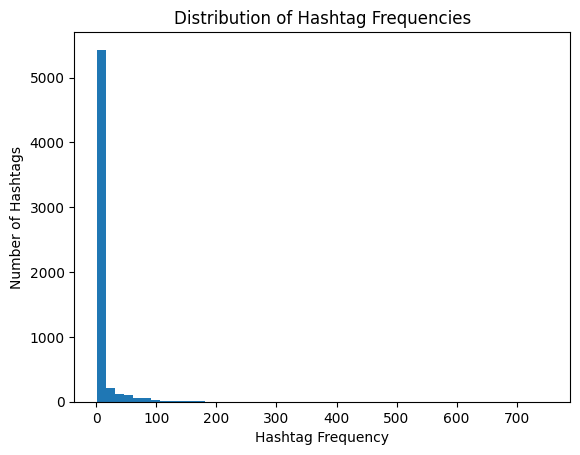

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset and preprocess the hashtags
# ... (Assuming you have already loaded the dataset into a pandas DataFrame named 'data')

# Preprocessing: Drop rows with missing hashtags
data = data.dropna(subset=['tweet_hashtags'])

# Preprocessing: Create a new column to indicate the frequency of each hashtag
hashtags_freq = data['tweet_hashtags'].str.split(',')
hashtags_freq_counts = hashtags_freq.explode().value_counts()

# Explore the distribution of hashtag frequencies
plt.hist(hashtags_freq_counts, bins=50)
plt.xlabel('Hashtag Frequency')
plt.ylabel('Number of Hashtags')
plt.title('Distribution of Hashtag Frequencies')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset and preprocess the hashtags (similar to the previous code)

# Create a new column to indicate if the tweet is trending (1) or not (0) (similar to the previous code)

# Split the data into training and testing sets (similar to the previous code)

# Convert the hashtags into numerical features using CountVectorizer (similar to the previous code)

# Train the Gradient Boosting Decision Trees (GBDT) classifier
gbdt_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators
gbdt_classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = gbdt_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# You can also check the precision, recall, and F1-score using classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.8825413774693006
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      3401
           1       0.98      0.71      0.83      2218

    accuracy                           0.88      5619
   macro avg       0.91      0.85      0.87      5619
weighted avg       0.90      0.88      0.88      5619



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset and preprocess the hashtags (similar to the previous code)
# ...

# Create a new column to indicate if the tweet is trending (1) or not (0) (similar to the previous code)
# ...

# Split the data into training and testing sets (similar to the previous code)
# ...

# Convert the hashtags into numerical features using CountVectorizer (similar to the previous code)
vectorizer = CountVectorizer(max_features=1000)  # You can adjust the max_features as needed
X_train_vectorized = vectorizer.fit_transform(X_train.apply(','.join))
X_test_vectorized = vectorizer.transform(X_test.apply(','.join))

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# You can also check the precision, recall, and F1-score using classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.9289909236518954
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      3401
           1       0.89      0.93      0.91      2218

    accuracy                           0.93      5619
   macro avg       0.92      0.93      0.93      5619
weighted avg       0.93      0.93      0.93      5619



In [ ]:
data.head()

,tweet_id,tweet_datetime,tweet_hashtags,tweet_language,retweet_count,tweet_source,tweet_source_url,tweet_text,user_created_datetime,user_name,user_followers_count,user_description,user_location,searched_by_hashtag,searched_at_datetime,searched_hashtag_country,hashtag_frequency,trending
0,1399565320025640961,2021-06-01 03:15:49,agedcare,en,59,Twitter Web App,https://mobile.twitter.com,RT @SenatorSiewert: The Government are acting ...,2015-03-19 19:29:57,"Richard Forrester: Anti Fascist, Evil #SewerRat 🐀",3526.0,Commenting & working towards social justice & ...,Mornington Peninsula Melbourne,#estimates,2021-06-01 03:15:46.457488,Australia,8,0
1,1399565250723139586,2021-06-01 03:15:33,estimates,en,4,Twitter for iPhone,http://twitter.com/download/iphone,RT @TomMcIlroy: Some aged care vax stats given...,2014-01-15 22:32:01,Say No To Murdoch’s IPA 🥊,2017.0,“The Future Is Determined By Those Who Show Up...,Straya,#estimates,2021-06-01 03:15:46.457488,Australia,44,0
5,1399565025421840389,2021-06-01 03:14:39,estimates,en,23,Twitter for iPhone,http://twitter.com/download/iphone,RT @TomMcIlroy: Breaking: Chief Medical Office...,2014-01-15 22:32:01,Say No To Murdoch’s IPA 🥊,2017.0,“The Future Is Determined By Those Who Show Up...,Straya,#estimates,2021-06-01 03:15:46.457488,Australia,44,0
6,1399565019277193223,2021-06-01 03:14:37,estimates,en,10,Twitter Web App,https://mobile.twitter.com,RT @BelindaJones68: #estimates Senator Askew w...,2019-01-29 09:26:42,Tracey Hall,637.0,"Mum of 3, Baba of 1. All for social justice, ...","Melbourne, Victoria",#estimates,2021-06-01 03:15:46.457488,Australia,44,0
7,1399564957956513792,2021-06-01 03:14:23,estimates,en,23,Twitter Web App,https://mobile.twitter.com,RT @TomMcIlroy: Breaking: Chief Medical Office...,2008-11-12 23:43:02,Ash Leahy,6685.0,"Tweets politics, sorry. Dad. Husband. Operatio...","Patterson Lakes, Melbourne.",#estimates,2021-06-01 03:15:46.457488,Australia,44,0


In [ ]:
data["tweet"]